In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [4]:
!pip install textblob

In [6]:
!pip install wordcloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
import os
import matplotlib.pyplot as plt


In [18]:
from wordcloud import WordCloud

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
!pip install scikit-learn

In [26]:
import sklearn

In [28]:
df = pd.read_csv('vaccination_tweets.csv')

In [30]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [34]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [36]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [38]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [40]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [42]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [44]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [46]:
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
text_df.text = text_df['text'].apply(data_processing)

In [52]:
text_df = text_df.drop_duplicates('text')

In [54]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [56]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [58]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [60]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [62]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [64]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [66]:
from textblob import TextBlob

In [68]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [70]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [72]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [74]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

text_df.head()



,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

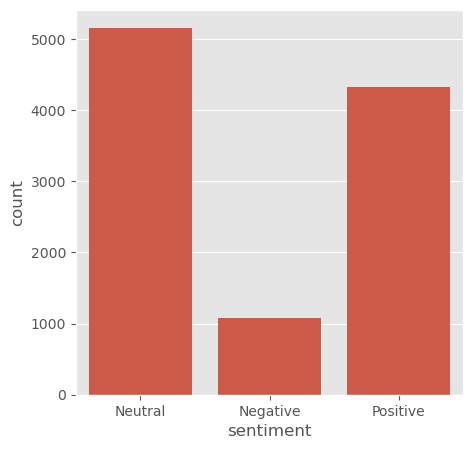

In [76]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

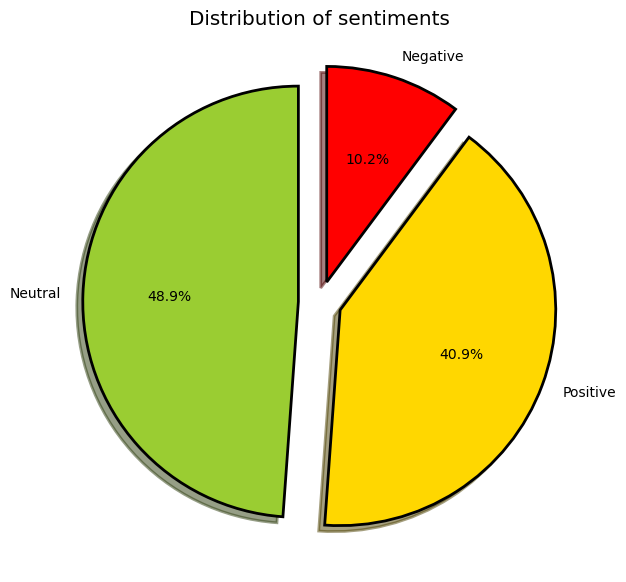

In [78]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [80]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


In [82]:
import matplotlib.pyplot as plt

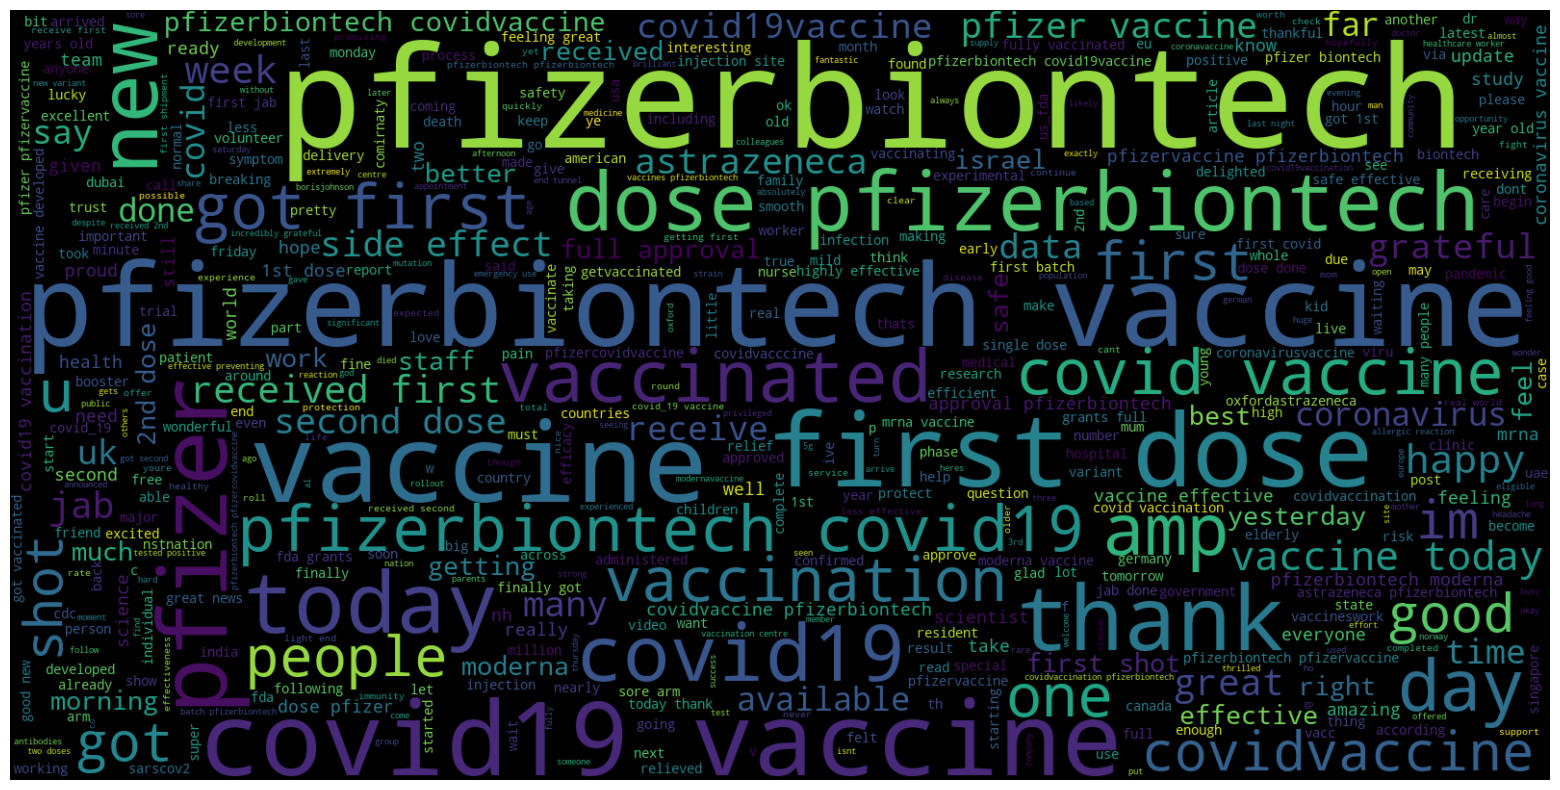

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your text data
text =  ' '.join([word for word in pos_tweets['text']])

# Create the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [86]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


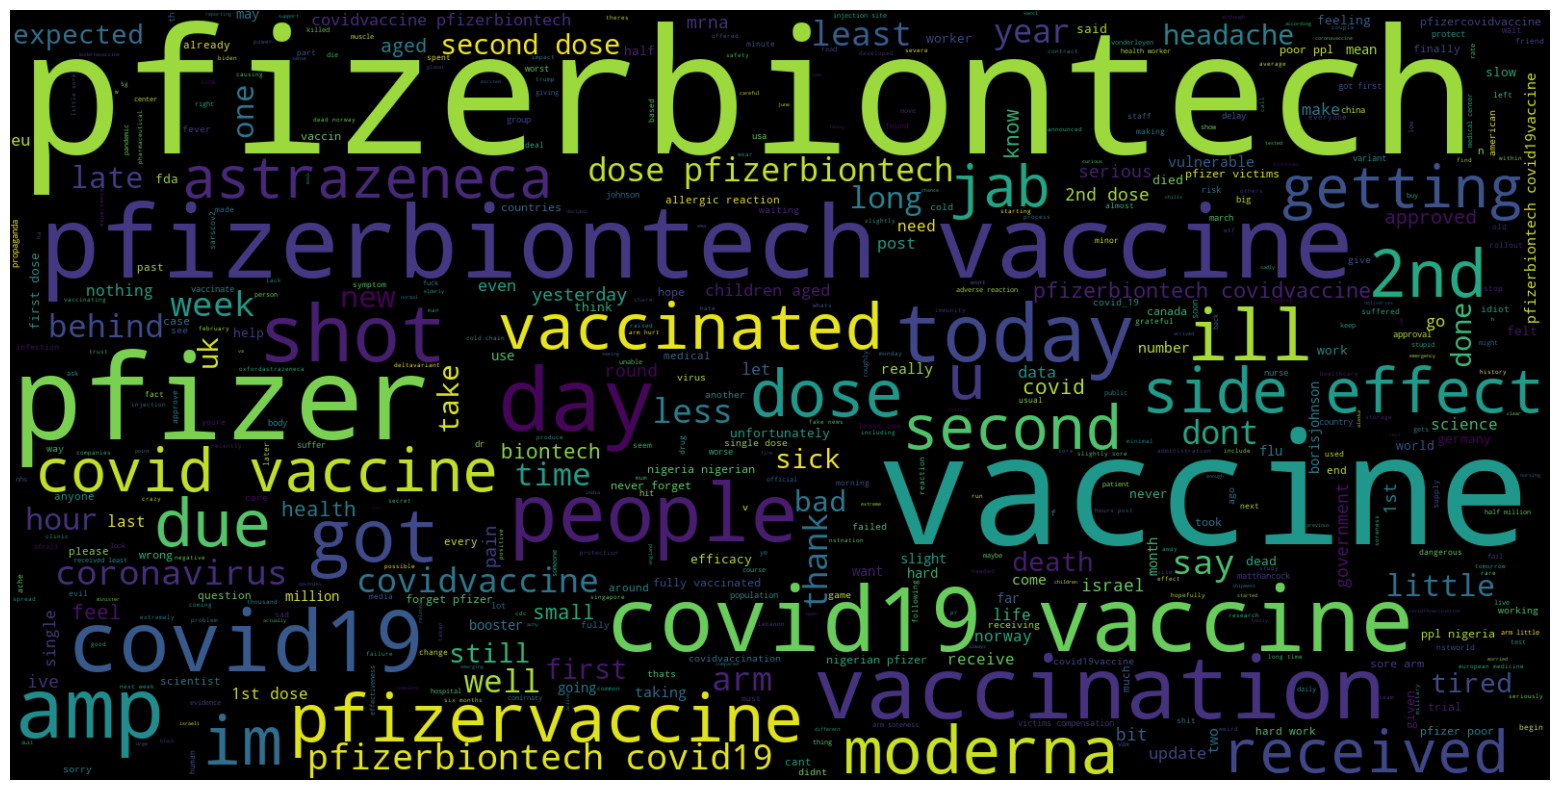

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your text data
text =  ' '.join([word for word in neg_tweets['text']])

# Create the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


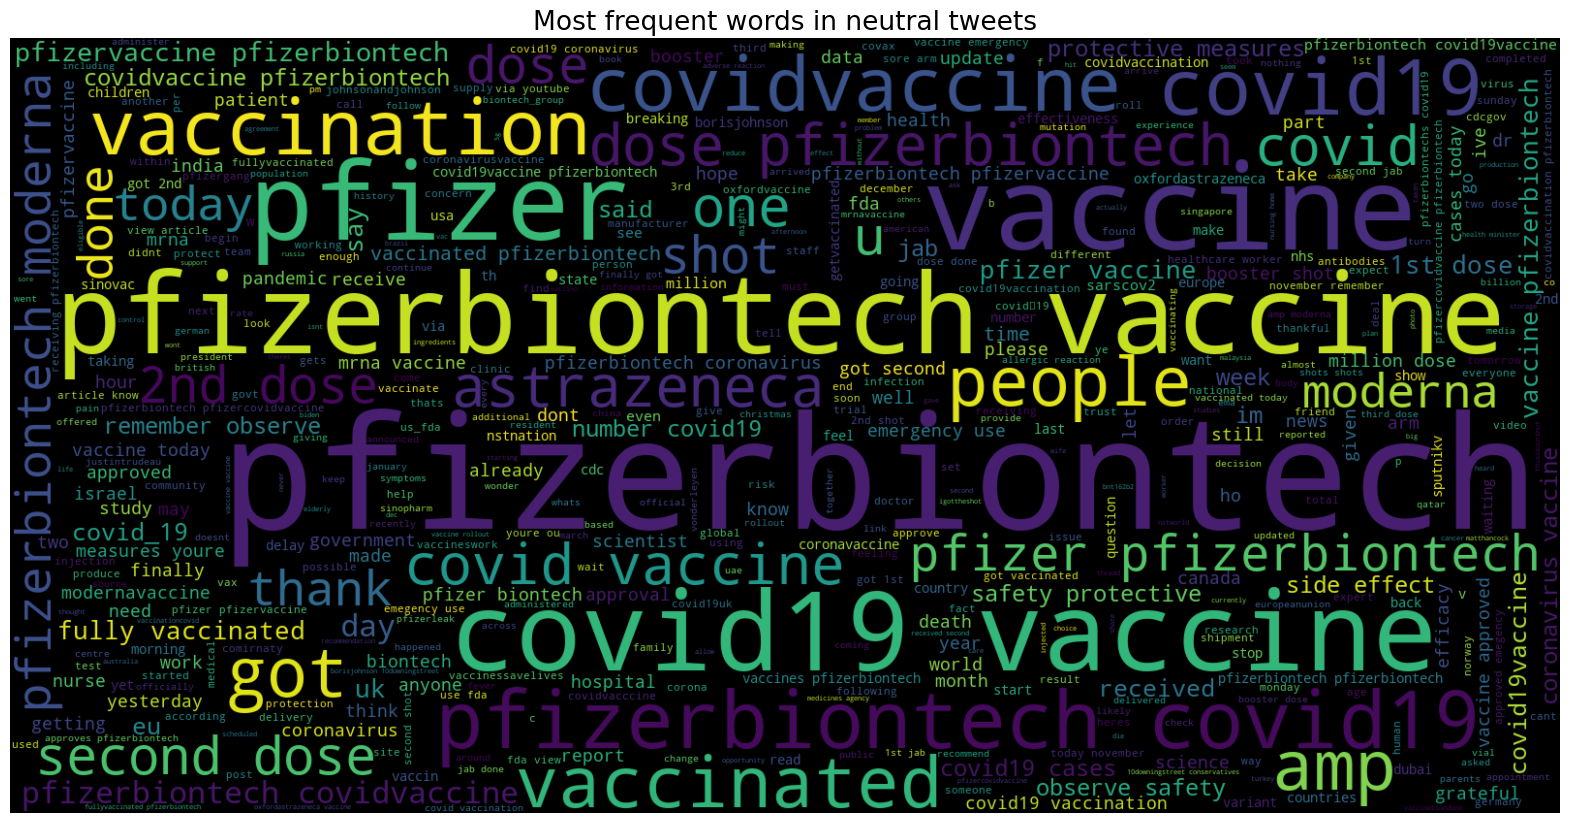

In [92]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()



In [94]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [96]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']


In [98]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 78583)
Size of y_train: (8434,)
Size of x_test: (2109, 78583)
Size of y_test: (2109,)


In [104]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.64%


In [110]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



In [114]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


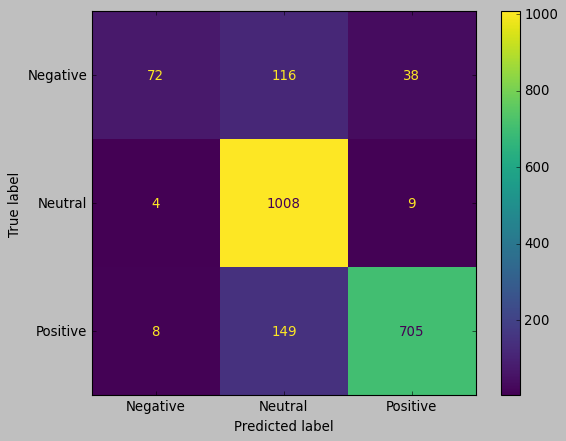

In [116]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [118]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [122]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [124]:
y_pred = grid.predict(x_test)

In [126]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.30%


In [128]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  90  101   35]
 [   5 1006   10]
 [   9  129  724]]


              precision    recall  f1-score   support

    Negative       0.87      0.40      0.55       226
     Neutral       0.81      0.99      0.89      1021
    Positive       0.94      0.84      0.89       862

    accuracy                           0.86      2109
   macro avg       0.87      0.74      0.77      2109
weighted avg       0.87      0.86      0.85      2109



In [130]:
from sklearn.svm import LinearSVC

In [132]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [134]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 87.34%


In [136]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 101   91   34]
 [   6 1007    8]
 [  14  114  734]]


              precision    recall  f1-score   support

    Negative       0.83      0.45      0.58       226
     Neutral       0.83      0.99      0.90      1021
    Positive       0.95      0.85      0.90       862

    accuracy                           0.87      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.88      0.87      0.87      2109



In [138]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [140]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [142]:
y_pred = grid.predict(x_test)

In [144]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.58%


In [146]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 105   87   34]
 [   7 1005    9]
 [  14  111  737]]


              precision    recall  f1-score   support

    Negative       0.83      0.46      0.60       226
     Neutral       0.84      0.98      0.90      1021
    Positive       0.94      0.85      0.90       862

    accuracy                           0.88      2109
   macro avg       0.87      0.77      0.80      2109
weighted avg       0.88      0.88      0.87      2109



In [148]:
!pip install tweepy

In [150]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [152]:
import tweepy
print(tweepy.__version__)  # Optional: Check the installed version

4.14.0


In [6]:
import tkinter as tk
root = tk.Tk()
root.destroy()

In [ ]:
# Install necessary packages if not already installed
!pip install textblob emoji nltk

# Import necessary libraries
from tkinter import *
from textblob import TextBlob
import emoji  # For emoji rendering

# Function to analyze sentiment and display emoji with polarity score
def analyze_sentiment():
    sentence = entry_sentence.get()
    analysis = TextBlob(sentence)
    sentiment = analysis.sentiment.polarity  # Polarity score: -1 to 1

    # Determine sentiment and display corresponding emoji with accuracy
    if sentiment > 0:
        result = f"😊 Positive (Polarity: {sentiment:.2f})"
        result_label.config(fg="#28a745")  # Green for positive
    elif sentiment < 0:
        result = f"😢 Negative (Polarity: {sentiment:.2f})"
        result_label.config(fg="#dc3545")  # Red for negative
    else:
        result = f"😐 Neutral (Polarity: {sentiment:.2f})"
        result_label.config(fg="#6c757d")  # Gray for neutral

    result_label.config(text=result)

# Create GUI using Tkinter
root = Tk()
root.title("Twitter Sentiment Analysis")
root.geometry("500x400")
root.configure(bg="#f8f9fa")  # Light background color

# Title
title_label = Label(root, text="Twitter Sentiment Analysis", font=("Helvetica", 20, "bold"), 
                    bg="#343a40", fg="white", pady=10)
title_label.pack(fill=X)

# Sentence input field with styling
entry_frame = Frame(root, bg="#f8f9fa")
entry_frame.pack(pady=20)

entry_sentence = Entry(entry_frame, width=40, font=("Arial", 14), 
                       bd=2, relief="solid", justify=CENTER)
entry_sentence.pack(padx=10, pady=5)

# Predict Button with CSS-like styling
predict_button = Button(root, text="Analyze Sentiment", command=analyze_sentiment, 
                        font=("Arial", 14), bg="#007bff", fg="white", activebackground="#0056b3",
                        relief="raised", padx=10, pady=5)
predict_button.pack(pady=10)

# Result Label to display sentiment and emoji
result_label = Label(root, text="", font=("Arial", 16, "bold"), bg="#f8f9fa")
result_label.pack(pady=20)

# Footer to fill bottom space
footer_label = Label(root, text="Powered by TextBlob & Tkinter", font=("Arial", 10), 
                     bg="#343a40", fg="white", pady=5)
footer_label.pack(fill=X, side=BOTTOM)

# Start the GUI loop
root.mainloop()
